read dataset to predict wheather a person would buy life insurnace based on his age using logistic regression

Split train and test set with test sizen 0.2

Preprocessing: Scale the data so that both age and affordibility are in same scaling range

steps-to-building-a-neural-network-using-keras using 3 step============

model building or configuration===>1 output(bought insurance),2 input(age,affordibility) and sigmoid as it is output layer and use only one fully connected layer

compiling

trained and test using fit for 5000 epoc

check loss and accuracy of train and test dataset using model evaluate

predict test dataset to verify all possiblities

calculate w1,w2 and bias then activation function

Instead of model.predict, write our own prediction function that uses w1,w2 and bias

calculate log loss



In [1]:
#Implement Gradient Descent For Neural Network (or Logistic Regression)
#Predicting if a person would buy life insurnace based on his age using logistic regression
#Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [2]:
#readcsv file
#Split train and test set
#Preprocessing: Scale the data so that both age and affordibility are in same scaling range dividing by 100
#model building phase==create neural network 
# keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
# 1 is specify one output bought_insurance and input_shape=(2,) that is age and affordibility for output layer mostly use sigmoid
#compile model and trained it
#evalute model to find loss and accuracy
#predict model to compare with y_test how much our model accurate
#find coef(weights), intercept  means bias
# calculate sigmoid 
#Instead of model.predict, write our own prediction function that uses w1,w2 and bias
#calculate gradient descent function using python code

# Question

why gradient descent method is used

in which part error or loss is minimum

formulla to calculate new weight

How to perform scaling

write code for model building or configuration

code to calculate coef, intercept
 
Instead of model.predict, write our own prediction function that uses w1,w2 and bias


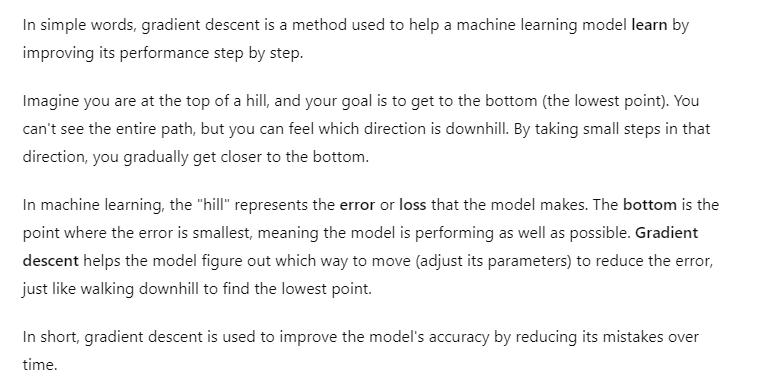

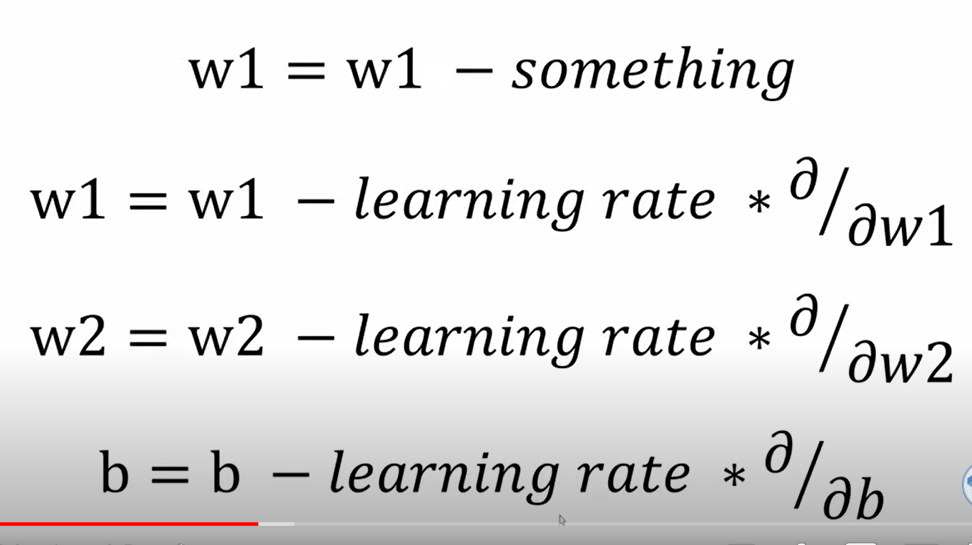



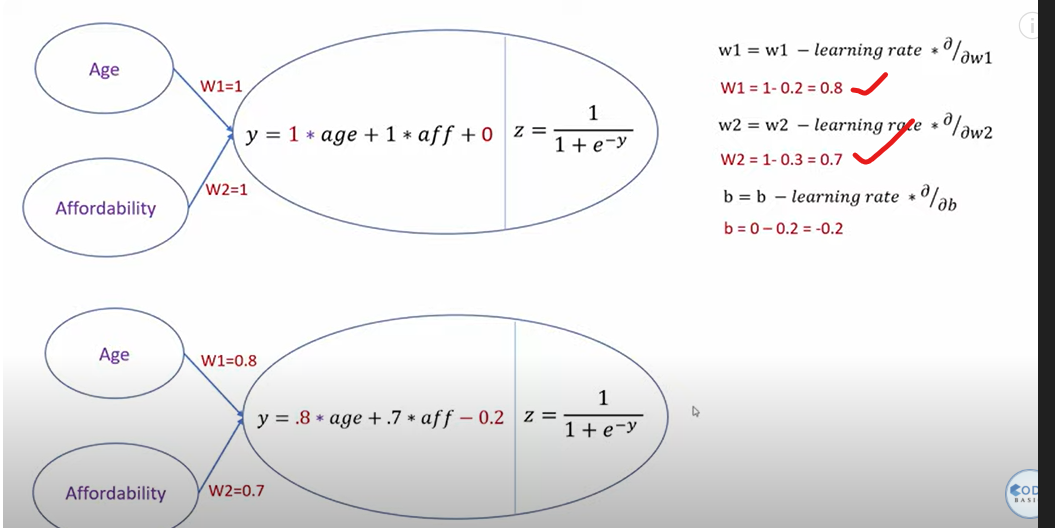

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
# Specify the path to your CSV file
file_path = r'R:\ML\DEEP learning\csv\insurance_data.csv'

# Load the CSV file into a DataFrame
df= pd.read_csv(file_path)
df

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1
5,56,1,1
6,55,0,0
7,60,0,1
8,62,1,1
9,61,1,1


In [5]:
#Split train and test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)

In [7]:
#Preprocessing: Scale the data so that both age and affordibility are in same scaling range

In [8]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

In [9]:
X_train_scaled

,age,affordibility
0,0.22,1
13,0.29,0
6,0.55,0
17,0.58,1
24,0.50,1
19,0.18,1
25,0.54,1
16,0.25,0
20,0.21,1
3,0.52,0


In [10]:
#Model Building: First build a model in keras/tensorflow and see what weights and bias values it comes up with. We will than try to reproduce same weights and bias in our plain python implementation of gradient descent. Below is the architecture of our simple neural network

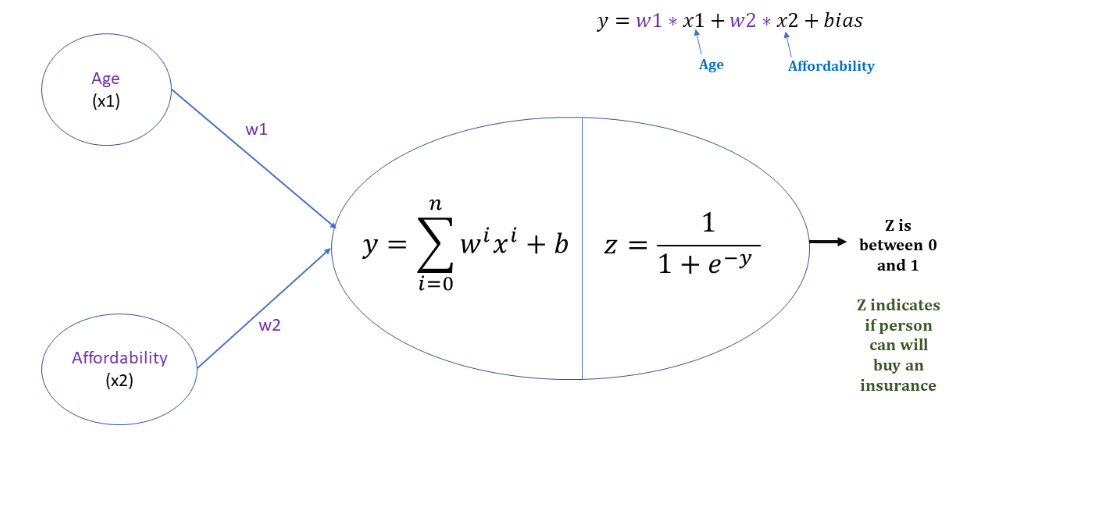

In [11]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5000)

C:\Users\rakes\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7113
Epoch 2/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.5000 - loss: 0.7110
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.5000 - loss: 0.7106
Epoch 4/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5000 - loss: 0.7102
Epoch 5/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5000 - loss: 0.7098
Epoch 6/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5000 - loss: 0.7094
Epoch 7/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5000 - loss: 0.7091
Epoch 8/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5000 - loss: 0.7087
Epoch 9/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5000 - loss: 0.7083
Epoch 10/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5000 - loss: 0.7079
Epoch 11/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5000 - loss: 0.7076
Epoch 12/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5000 - loss: 0.6877
Epoch 70/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5000 - loss: 0.6874
Epoch 71/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5000 - loss: 0.6871
Epoch 72/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5000 - loss: 0.6868
Epoch 73/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.5000 - loss: 0.6865
Epoch 74/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5000 - loss: 0.6862
Epoch 75/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5000 - loss: 0.6859
Epoch 76/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.5000 - loss: 0.6856
Epoch 77/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5000 - loss: 0.6853
Epoch 78/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5000 - loss: 0.6849
Epoch 79/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5000 - loss: 0.6846
Epoch 80/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5000 - loss: 0.6690
Epoch 138/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5000 - loss: 0.6687
Epoch 139/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5000 - loss: 0.6685
Epoch 140/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5000 - loss: 0.6683
Epoch 141/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5000 - loss: 0.6680
Epoch 142/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5000 - loss: 0.6678
Epoch 143/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5000 - loss: 0.6675
Epoch 144/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5000 - loss: 0.6673
Epoch 145/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5000 - loss: 0.6671
Epoch 146/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5000 - loss: 0.6668
Epoch 147/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5000 - loss: 0.6666
Epoch 148/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - ac

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5455 - loss: 0.6549
Epoch 205/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5455 - loss: 0.6547
Epoch 206/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5455 - loss: 0.6545
Epoch 207/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5455 - loss: 0.6544
Epoch 208/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5455 - loss: 0.6542
Epoch 209/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.5455 - loss: 0.6540
Epoch 210/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5455 - loss: 0.6538
Epoch 211/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.5455 - loss: 0.6537
Epoch 212/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5455 - loss: 0.6535
Epoch 213/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.5455 - loss: 0.6533
Epoch 214/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5455 - loss: 0.6531
Epoch 215/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - a

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6364 - loss: 0.6445
Epoch 272/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6364 - loss: 0.6444
Epoch 273/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6364 - loss: 0.6442
Epoch 274/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6364 - loss: 0.6441
Epoch 275/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6364 - loss: 0.6440
Epoch 276/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6364 - loss: 0.6438
Epoch 277/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.6364 - loss: 0.6437
Epoch 278/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6364 - loss: 0.6436
Epoch 279/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6364 - loss: 0.6435
Epoch 280/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6364 - loss: 0.6433
Epoch 281/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6364 - loss: 0.6432
Epoch 282/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6364 - loss: 0.6369
Epoch 339/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6364 - loss: 0.6368
Epoch 340/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6364 - loss: 0.6367
Epoch 341/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6364 - loss: 0.6366
Epoch 342/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6364 - loss: 0.6365
Epoch 343/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6364 - loss: 0.6364
Epoch 344/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.6364 - loss: 0.6363
Epoch 345/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6364 - loss: 0.6362
Epoch 346/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6364 - loss: 0.6361
Epoch 347/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6364 - loss: 0.6361
Epoch 348/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6364 - loss: 0.6360
Epoch 349/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6364 - loss: 0.6313
Epoch 406/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6364 - loss: 0.6312
Epoch 407/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6364 - loss: 0.6312
Epoch 408/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6364 - loss: 0.6311
Epoch 409/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6364 - loss: 0.6310
Epoch 410/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6364 - loss: 0.6309
Epoch 411/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6364 - loss: 0.6309
Epoch 412/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6364 - loss: 0.6308
Epoch 413/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6364 - loss: 0.6307
Epoch 414/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6364 - loss: 0.6307
Epoch 415/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6364 - loss: 0.6306
Epoch 416/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6364 - loss: 0.6269
Epoch 473/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.6364 - loss: 0.6269
Epoch 474/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6364 - loss: 0.6268
Epoch 475/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6364 - loss: 0.6268
Epoch 476/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6364 - loss: 0.6267
Epoch 477/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6364 - loss: 0.6267
Epoch 478/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6364 - loss: 0.6266
Epoch 479/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6364 - loss: 0.6265
Epoch 480/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6364 - loss: 0.6265
Epoch 481/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6364 - loss: 0.6264
Epoch 482/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6364 - loss: 0.6264
Epoch 483/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6818 - loss: 0.6233
Epoch 540/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6818 - loss: 0.6232
Epoch 541/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.6818 - loss: 0.6232
Epoch 542/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6818 - loss: 0.6231
Epoch 543/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6818 - loss: 0.6231
Epoch 544/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6818 - loss: 0.6230
Epoch 545/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6818 - loss: 0.6230
Epoch 546/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6818 - loss: 0.6229
Epoch 547/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6818 - loss: 0.6229
Epoch 548/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6818 - loss: 0.6228
Epoch 549/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6818 - loss: 0.6227
Epoch 550/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7273 - loss: 0.6199
Epoch 607/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.7273 - loss: 0.6199
Epoch 608/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7273 - loss: 0.6198
Epoch 609/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7273 - loss: 0.6198
Epoch 610/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.7273 - loss: 0.6197
Epoch 611/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7273 - loss: 0.6197
Epoch 612/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7273 - loss: 0.6196
Epoch 613/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7273 - loss: 0.6196
Epoch 614/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7273 - loss: 0.6195
Epoch 615/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7273 - loss: 0.6195
Epoch 616/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.7273 - loss: 0.6194
Epoch 617/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.7273 - loss: 0.6166
Epoch 674/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7273 - loss: 0.6166
Epoch 675/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7273 - loss: 0.6166
Epoch 676/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7273 - loss: 0.6165
Epoch 677/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7273 - loss: 0.6165
Epoch 678/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7273 - loss: 0.6164
Epoch 679/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7273 - loss: 0.6164
Epoch 680/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7273 - loss: 0.6163
Epoch 681/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7273 - loss: 0.6163
Epoch 682/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7273 - loss: 0.6162
Epoch 683/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.7273 - loss: 0.6162
Epoch 684/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - ac

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7273 - loss: 0.6134
Epoch 741/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7273 - loss: 0.6134
Epoch 742/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.7273 - loss: 0.6133
Epoch 743/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7273 - loss: 0.6133
Epoch 744/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.7273 - loss: 0.6132
Epoch 745/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7273 - loss: 0.6132
Epoch 746/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7273 - loss: 0.6131
Epoch 747/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7273 - loss: 0.6131
Epoch 748/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7273 - loss: 0.6130
Epoch 749/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7273 - loss: 0.6130
Epoch 750/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.7273 - loss: 0.6129
Epoch 751/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - ac

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7273 - loss: 0.6102
Epoch 808/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7273 - loss: 0.6101
Epoch 809/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.7273 - loss: 0.6101
Epoch 810/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7273 - loss: 0.6100
Epoch 811/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7273 - loss: 0.6100
Epoch 812/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7273 - loss: 0.6099
Epoch 813/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.7273 - loss: 0.6099
Epoch 814/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7273 - loss: 0.6098
Epoch 815/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7273 - loss: 0.6098
Epoch 816/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7273 - loss: 0.6097
Epoch 817/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7273 - loss: 0.6097
Epoch 818/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7273 - loss: 0.6069
Epoch 875/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7273 - loss: 0.6068
Epoch 876/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7273 - loss: 0.6068
Epoch 877/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7273 - loss: 0.6067
Epoch 878/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7273 - loss: 0.6067
Epoch 879/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7273 - loss: 0.6066
Epoch 880/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7273 - loss: 0.6066
Epoch 881/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.7273 - loss: 0.6065
Epoch 882/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7273 - loss: 0.6065
Epoch 883/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7273 - loss: 0.6064
Epoch 884/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7273 - loss: 0.6064
Epoch 885/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6818 - loss: 0.6036
Epoch 942/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6818 - loss: 0.6035
Epoch 943/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6818 - loss: 0.6035
Epoch 944/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6818 - loss: 0.6034
Epoch 945/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6818 - loss: 0.6034
Epoch 946/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.6818 - loss: 0.6033
Epoch 947/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6818 - loss: 0.6033
Epoch 948/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6818 - loss: 0.6032
Epoch 949/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6818 - loss: 0.6032
Epoch 950/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6818 - loss: 0.6031
Epoch 951/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6818 - loss: 0.6031
Epoch 952/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6818 - loss: 0.6002
Epoch 1009/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6818 - loss: 0.6002
Epoch 1010/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6818 - loss: 0.6001
Epoch 1011/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6818 - loss: 0.6001
Epoch 1012/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6818 - loss: 0.6000
Epoch 1013/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6818 - loss: 0.6000
Epoch 1014/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6818 - loss: 0.5999
Epoch 1015/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6818 - loss: 0.5999
Epoch 1016/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6818 - loss: 0.5998
Epoch 1017/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6818 - loss: 0.5998
Epoch 1018/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6818 - loss: 0.5997
Epoch 1019/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6818 - loss: 0.5969
Epoch 1076/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6818 - loss: 0.5968
Epoch 1077/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6818 - loss: 0.5968
Epoch 1078/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6818 - loss: 0.5967
Epoch 1079/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.6818 - loss: 0.5967
Epoch 1080/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6818 - loss: 0.5966
Epoch 1081/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6818 - loss: 0.5966
Epoch 1082/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6818 - loss: 0.5965
Epoch 1083/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6818 - loss: 0.5965
Epoch 1084/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6818 - loss: 0.5964
Epoch 1085/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6818 - loss: 0.5964
Epoch 1086/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6818 - loss: 0.5935
Epoch 1143/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.6818 - loss: 0.5935
Epoch 1144/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6818 - loss: 0.5934
Epoch 1145/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6818 - loss: 0.5934
Epoch 1146/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6818 - loss: 0.5933
Epoch 1147/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6818 - loss: 0.5933
Epoch 1148/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6818 - loss: 0.5932
Epoch 1149/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6818 - loss: 0.5932
Epoch 1150/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6818 - loss: 0.5931
Epoch 1151/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6818 - loss: 0.5931
Epoch 1152/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6818 - loss: 0.5930
Epoch 1153/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6818 - loss: 0.5902
Epoch 1210/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6818 - loss: 0.5901
Epoch 1211/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6818 - loss: 0.5901
Epoch 1212/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6818 - loss: 0.5900
Epoch 1213/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6818 - loss: 0.5900
Epoch 1214/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6818 - loss: 0.5899
Epoch 1215/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6818 - loss: 0.5899
Epoch 1216/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6818 - loss: 0.5898
Epoch 1217/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6818 - loss: 0.5898
Epoch 1218/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6818 - loss: 0.5897
Epoch 1219/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6818 - loss: 0.5897
Epoch 1220/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6818 - loss: 0.5869
Epoch 1277/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6818 - loss: 0.5868
Epoch 1278/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6818 - loss: 0.5868
Epoch 1279/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6818 - loss: 0.5867
Epoch 1280/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6818 - loss: 0.5867
Epoch 1281/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6818 - loss: 0.5866
Epoch 1282/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6818 - loss: 0.5866
Epoch 1283/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6818 - loss: 0.5865
Epoch 1284/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6818 - loss: 0.5865
Epoch 1285/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6818 - loss: 0.5864
Epoch 1286/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6818 - loss: 0.5864
Epoch 1287/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6818 - loss: 0.5836
Epoch 1344/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6818 - loss: 0.5835
Epoch 1345/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6818 - loss: 0.5835
Epoch 1346/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6818 - loss: 0.5834
Epoch 1347/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6818 - loss: 0.5834
Epoch 1348/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6818 - loss: 0.5833
Epoch 1349/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6818 - loss: 0.5833
Epoch 1350/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6818 - loss: 0.5832
Epoch 1351/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6818 - loss: 0.5832
Epoch 1352/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6818 - loss: 0.5831
Epoch 1353/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6818 - loss: 0.5831
Epoch 1354/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6818 - loss: 0.5803
Epoch 1411/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6818 - loss: 0.5802
Epoch 1412/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6818 - loss: 0.5802
Epoch 1413/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6818 - loss: 0.5801
Epoch 1414/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6818 - loss: 0.5801
Epoch 1415/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6818 - loss: 0.5800
Epoch 1416/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.6818 - loss: 0.5800
Epoch 1417/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6818 - loss: 0.5799
Epoch 1418/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6818 - loss: 0.5799
Epoch 1419/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6818 - loss: 0.5798
Epoch 1420/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6818 - loss: 0.5798
Epoch 1421/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6818 - loss: 0.5770
Epoch 1478/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6818 - loss: 0.5770
Epoch 1479/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6818 - loss: 0.5769
Epoch 1480/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6818 - loss: 0.5769
Epoch 1481/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6818 - loss: 0.5768
Epoch 1482/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6818 - loss: 0.5768
Epoch 1483/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6818 - loss: 0.5767
Epoch 1484/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6818 - loss: 0.5767
Epoch 1485/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6818 - loss: 0.5766
Epoch 1486/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6818 - loss: 0.5766
Epoch 1487/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6818 - loss: 0.5765
Epoch 1488/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6818 - loss: 0.5738
Epoch 1545/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6818 - loss: 0.5737
Epoch 1546/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6818 - loss: 0.5737
Epoch 1547/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.6818 - loss: 0.5736
Epoch 1548/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6818 - loss: 0.5736
Epoch 1549/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6818 - loss: 0.5735
Epoch 1550/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6818 - loss: 0.5735
Epoch 1551/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.6818 - loss: 0.5734
Epoch 1552/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.6818 - loss: 0.5734
Epoch 1553/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6818 - loss: 0.5733
Epoch 1554/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6818 - loss: 0.5733
Epoch 1555/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6818 - loss: 0.5706
Epoch 1612/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6818 - loss: 0.5705
Epoch 1613/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6818 - loss: 0.5705
Epoch 1614/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6818 - loss: 0.5704
Epoch 1615/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6818 - loss: 0.5704
Epoch 1616/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6818 - loss: 0.5703
Epoch 1617/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6818 - loss: 0.5703
Epoch 1618/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6818 - loss: 0.5702
Epoch 1619/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6818 - loss: 0.5702
Epoch 1620/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6818 - loss: 0.5702
Epoch 1621/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6818 - loss: 0.5701
Epoch 1622/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6818 - loss: 0.5674
Epoch 1679/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6818 - loss: 0.5674
Epoch 1680/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6818 - loss: 0.5673
Epoch 1681/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6818 - loss: 0.5673
Epoch 1682/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6818 - loss: 0.5672
Epoch 1683/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6818 - loss: 0.5672
Epoch 1684/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6818 - loss: 0.5671
Epoch 1685/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6818 - loss: 0.5671
Epoch 1686/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6818 - loss: 0.5670
Epoch 1687/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6818 - loss: 0.5670
Epoch 1688/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6818 - loss: 0.5670
Epoch 1689/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6818 - loss: 0.5643
Epoch 1746/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6818 - loss: 0.5643
Epoch 1747/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6818 - loss: 0.5642
Epoch 1748/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6818 - loss: 0.5642
Epoch 1749/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6818 - loss: 0.5641
Epoch 1750/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6818 - loss: 0.5641
Epoch 1751/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6818 - loss: 0.5640
Epoch 1752/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6818 - loss: 0.5640
Epoch 1753/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6818 - loss: 0.5639
Epoch 1754/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6818 - loss: 0.5639
Epoch 1755/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.6818 - loss: 0.5638
Epoch 1756/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.6818 - loss: 0.5612
Epoch 1813/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6818 - loss: 0.5612
Epoch 1814/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6818 - loss: 0.5611
Epoch 1815/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6818 - loss: 0.5611
Epoch 1816/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6818 - loss: 0.5610
Epoch 1817/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6818 - loss: 0.5610
Epoch 1818/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6818 - loss: 0.5609
Epoch 1819/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6818 - loss: 0.5609
Epoch 1820/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6818 - loss: 0.5609
Epoch 1821/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6818 - loss: 0.5608
Epoch 1822/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6818 - loss: 0.5608
Epoch 1823/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6818 - loss: 0.5582
Epoch 1880/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6818 - loss: 0.5581
Epoch 1881/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6818 - loss: 0.5581
Epoch 1882/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6818 - loss: 0.5580
Epoch 1883/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6818 - loss: 0.5580
Epoch 1884/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6818 - loss: 0.5580
Epoch 1885/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6818 - loss: 0.5579
Epoch 1886/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6818 - loss: 0.5579
Epoch 1887/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6818 - loss: 0.5578
Epoch 1888/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6818 - loss: 0.5578
Epoch 1889/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6818 - loss: 0.5577
Epoch 1890/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6818 - loss: 0.5552
Epoch 1947/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6818 - loss: 0.5551
Epoch 1948/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6818 - loss: 0.5551
Epoch 1949/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.6818 - loss: 0.5551
Epoch 1950/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.6818 - loss: 0.5550
Epoch 1951/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6818 - loss: 0.5550
Epoch 1952/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6818 - loss: 0.5549
Epoch 1953/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6818 - loss: 0.5549
Epoch 1954/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6818 - loss: 0.5548
Epoch 1955/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6818 - loss: 0.5548
Epoch 1956/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.6818 - loss: 0.5547
Epoch 1957/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.6818 - loss: 0.5522
Epoch 2014/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.6818 - loss: 0.5522
Epoch 2015/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6818 - loss: 0.5521
Epoch 2016/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6818 - loss: 0.5521
Epoch 2017/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6818 - loss: 0.5521
Epoch 2018/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6818 - loss: 0.5520
Epoch 2019/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6818 - loss: 0.5520
Epoch 2020/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6818 - loss: 0.5519
Epoch 2021/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6818 - loss: 0.5519
Epoch 2022/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6818 - loss: 0.5518
Epoch 2023/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6818 - loss: 0.5518
Epoch 2024/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6818 - loss: 0.5493
Epoch 2081/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6818 - loss: 0.5493
Epoch 2082/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6818 - loss: 0.5492
Epoch 2083/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6818 - loss: 0.5492
Epoch 2084/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6818 - loss: 0.5492
Epoch 2085/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6818 - loss: 0.5491
Epoch 2086/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6818 - loss: 0.5491
Epoch 2087/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.6818 - loss: 0.5490
Epoch 2088/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6818 - loss: 0.5490
Epoch 2089/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6818 - loss: 0.5489
Epoch 2090/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6818 - loss: 0.5489
Epoch 2091/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6818 - loss: 0.5465
Epoch 2148/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6818 - loss: 0.5464
Epoch 2149/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.6818 - loss: 0.5464
Epoch 2150/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6818 - loss: 0.5463
Epoch 2151/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6818 - loss: 0.5463
Epoch 2152/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6818 - loss: 0.5463
Epoch 2153/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6818 - loss: 0.5462
Epoch 2154/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6818 - loss: 0.5462
Epoch 2155/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6818 - loss: 0.5461
Epoch 2156/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6818 - loss: 0.5461
Epoch 2157/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6818 - loss: 0.5460
Epoch 2158/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6818 - loss: 0.5437
Epoch 2215/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6818 - loss: 0.5436
Epoch 2216/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6818 - loss: 0.5436
Epoch 2217/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6818 - loss: 0.5435
Epoch 2218/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6818 - loss: 0.5435
Epoch 2219/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6818 - loss: 0.5435
Epoch 2220/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6818 - loss: 0.5434
Epoch 2221/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6818 - loss: 0.5434
Epoch 2222/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6818 - loss: 0.5433
Epoch 2223/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6818 - loss: 0.5433
Epoch 2224/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.6818 - loss: 0.5432
Epoch 2225/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7273 - loss: 0.5409
Epoch 2282/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7273 - loss: 0.5409
Epoch 2283/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.7273 - loss: 0.5408
Epoch 2284/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7273 - loss: 0.5408
Epoch 2285/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7273 - loss: 0.5407
Epoch 2286/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.7273 - loss: 0.5407
Epoch 2287/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7273 - loss: 0.5406
Epoch 2288/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7273 - loss: 0.5406
Epoch 2289/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7273 - loss: 0.5406
Epoch 2290/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7273 - loss: 0.5405
Epoch 2291/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7273 - loss: 0.5405
Epoch 2292/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.7273 - loss: 0.5382
Epoch 2349/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7273 - loss: 0.5381
Epoch 2350/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7273 - loss: 0.5381
Epoch 2351/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.7273 - loss: 0.5381
Epoch 2352/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7273 - loss: 0.5380
Epoch 2353/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7273 - loss: 0.5380
Epoch 2354/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7273 - loss: 0.5379
Epoch 2355/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.7273 - loss: 0.5379
Epoch 2356/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7273 - loss: 0.5379
Epoch 2357/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7273 - loss: 0.5378
Epoch 2358/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7273 - loss: 0.5378
Epoch 2359/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7273 - loss: 0.5355
Epoch 2416/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7273 - loss: 0.5355
Epoch 2417/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7273 - loss: 0.5354
Epoch 2418/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7273 - loss: 0.5354
Epoch 2419/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7273 - loss: 0.5353
Epoch 2420/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7273 - loss: 0.5353
Epoch 2421/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7273 - loss: 0.5353
Epoch 2422/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7273 - loss: 0.5352
Epoch 2423/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7273 - loss: 0.5352
Epoch 2424/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7273 - loss: 0.5352
Epoch 2425/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7273 - loss: 0.5351
Epoch 2426/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7273 - loss: 0.5329
Epoch 2483/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7273 - loss: 0.5328
Epoch 2484/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7273 - loss: 0.5328
Epoch 2485/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7273 - loss: 0.5328
Epoch 2486/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7273 - loss: 0.5327
Epoch 2487/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7273 - loss: 0.5327
Epoch 2488/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7273 - loss: 0.5327
Epoch 2489/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7273 - loss: 0.5326
Epoch 2490/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7273 - loss: 0.5326
Epoch 2491/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.7273 - loss: 0.5325
Epoch 2492/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7273 - loss: 0.5325
Epoch 2493/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7273 - loss: 0.5303
Epoch 2550/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7273 - loss: 0.5303
Epoch 2551/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7273 - loss: 0.5302
Epoch 2552/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7273 - loss: 0.5302
Epoch 2553/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.7273 - loss: 0.5302
Epoch 2554/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7273 - loss: 0.5301
Epoch 2555/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7273 - loss: 0.5301
Epoch 2556/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.7273 - loss: 0.5300
Epoch 2557/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7273 - loss: 0.5300
Epoch 2558/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7273 - loss: 0.5300
Epoch 2559/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7273 - loss: 0.5299
Epoch 2560/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7273 - loss: 0.5278
Epoch 2617/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7273 - loss: 0.5277
Epoch 2618/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7273 - loss: 0.5277
Epoch 2619/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7273 - loss: 0.5277
Epoch 2620/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7273 - loss: 0.5276
Epoch 2621/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7273 - loss: 0.5276
Epoch 2622/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7273 - loss: 0.5276
Epoch 2623/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.7273 - loss: 0.5275
Epoch 2624/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7273 - loss: 0.5275
Epoch 2625/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7273 - loss: 0.5274
Epoch 2626/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7273 - loss: 0.5274
Epoch 2627/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.7727 - loss: 0.5253
Epoch 2684/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7727 - loss: 0.5253
Epoch 2685/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.7727 - loss: 0.5252
Epoch 2686/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7727 - loss: 0.5252
Epoch 2687/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.7727 - loss: 0.5251
Epoch 2688/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7727 - loss: 0.5251
Epoch 2689/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7727 - loss: 0.5251
Epoch 2690/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.7727 - loss: 0.5250
Epoch 2691/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7727 - loss: 0.5250
Epoch 2692/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7727 - loss: 0.5250
Epoch 2693/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7727 - loss: 0.5249
Epoch 2694/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7727 - loss: 0.5229
Epoch 2751/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.7727 - loss: 0.5228
Epoch 2752/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7727 - loss: 0.5228
Epoch 2753/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7727 - loss: 0.5227
Epoch 2754/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7727 - loss: 0.5227
Epoch 2755/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.7727 - loss: 0.5227
Epoch 2756/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7727 - loss: 0.5226
Epoch 2757/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7727 - loss: 0.5226
Epoch 2758/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7727 - loss: 0.5226
Epoch 2759/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7727 - loss: 0.5225
Epoch 2760/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.7727 - loss: 0.5225
Epoch 2761/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8182 - loss: 0.5205
Epoch 2818/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8182 - loss: 0.5204
Epoch 2819/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8182 - loss: 0.5204
Epoch 2820/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.8182 - loss: 0.5204
Epoch 2821/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8182 - loss: 0.5203
Epoch 2822/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8182 - loss: 0.5203
Epoch 2823/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8182 - loss: 0.5203
Epoch 2824/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8182 - loss: 0.5202
Epoch 2825/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8182 - loss: 0.5202
Epoch 2826/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8182 - loss: 0.5201
Epoch 2827/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8182 - loss: 0.5201
Epoch 2828/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.8182 - loss: 0.5181
Epoch 2885/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8182 - loss: 0.5181
Epoch 2886/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8182 - loss: 0.5180
Epoch 2887/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8182 - loss: 0.5180
Epoch 2888/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8182 - loss: 0.5180
Epoch 2889/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8182 - loss: 0.5179
Epoch 2890/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.8182 - loss: 0.5179
Epoch 2891/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8182 - loss: 0.5179
Epoch 2892/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8182 - loss: 0.5178
Epoch 2893/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8182 - loss: 0.5178
Epoch 2894/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8182 - loss: 0.5178
Epoch 2895/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8182 - loss: 0.5158
Epoch 2952/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8182 - loss: 0.5158
Epoch 2953/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8182 - loss: 0.5157
Epoch 2954/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8182 - loss: 0.5157
Epoch 2955/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8182 - loss: 0.5157
Epoch 2956/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.8182 - loss: 0.5156
Epoch 2957/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8182 - loss: 0.5156
Epoch 2958/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.8182 - loss: 0.5156
Epoch 2959/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8182 - loss: 0.5155
Epoch 2960/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8636 - loss: 0.5155
Epoch 2961/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8636 - loss: 0.5155
Epoch 2962/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.8636 - loss: 0.5135
Epoch 3019/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8636 - loss: 0.5135
Epoch 3020/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8636 - loss: 0.5135
Epoch 3021/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8636 - loss: 0.5134
Epoch 3022/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8636 - loss: 0.5134
Epoch 3023/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8636 - loss: 0.5134
Epoch 3024/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8636 - loss: 0.5133
Epoch 3025/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8636 - loss: 0.5133
Epoch 3026/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8636 - loss: 0.5133
Epoch 3027/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8636 - loss: 0.5132
Epoch 3028/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8636 - loss: 0.5132
Epoch 3029/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8636 - loss: 0.5113
Epoch 3086/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8636 - loss: 0.5113
Epoch 3087/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.8636 - loss: 0.5113
Epoch 3088/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8636 - loss: 0.5112
Epoch 3089/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8636 - loss: 0.5112
Epoch 3090/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8636 - loss: 0.5112
Epoch 3091/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8636 - loss: 0.5111
Epoch 3092/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.8636 - loss: 0.5111
Epoch 3093/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8636 - loss: 0.5111
Epoch 3094/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8636 - loss: 0.5110
Epoch 3095/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8636 - loss: 0.5110
Epoch 3096/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8636 - loss: 0.5092
Epoch 3153/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8636 - loss: 0.5091
Epoch 3154/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8636 - loss: 0.5091
Epoch 3155/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8636 - loss: 0.5091
Epoch 3156/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8636 - loss: 0.5090
Epoch 3157/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8636 - loss: 0.5090
Epoch 3158/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8636 - loss: 0.5090
Epoch 3159/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.8636 - loss: 0.5089
Epoch 3160/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8636 - loss: 0.5089
Epoch 3161/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8636 - loss: 0.5089
Epoch 3162/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.8636 - loss: 0.5088
Epoch 3163/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8636 - loss: 0.5070
Epoch 3220/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8636 - loss: 0.5070
Epoch 3221/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8636 - loss: 0.5070
Epoch 3222/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8636 - loss: 0.5069
Epoch 3223/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8636 - loss: 0.5069
Epoch 3224/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8636 - loss: 0.5069
Epoch 3225/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8636 - loss: 0.5068
Epoch 3226/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8636 - loss: 0.5068
Epoch 3227/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.8636 - loss: 0.5068
Epoch 3228/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.8636 - loss: 0.5067
Epoch 3229/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.8636 - loss: 0.5067
Epoch 3230/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9091 - loss: 0.5049
Epoch 3287/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9091 - loss: 0.5049
Epoch 3288/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9091 - loss: 0.5049
Epoch 3289/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9091 - loss: 0.5048
Epoch 3290/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9091 - loss: 0.5048
Epoch 3291/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9091 - loss: 0.5048
Epoch 3292/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9091 - loss: 0.5047
Epoch 3293/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9091 - loss: 0.5047
Epoch 3294/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9091 - loss: 0.5047
Epoch 3295/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9091 - loss: 0.5046
Epoch 3296/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9091 - loss: 0.5046
Epoch 3297/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9091 - loss: 0.5029
Epoch 3354/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9091 - loss: 0.5028
Epoch 3355/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9091 - loss: 0.5028
Epoch 3356/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.5028
Epoch 3357/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9091 - loss: 0.5028
Epoch 3358/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.5027
Epoch 3359/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9091 - loss: 0.5027
Epoch 3360/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9091 - loss: 0.5027
Epoch 3361/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9091 - loss: 0.5026
Epoch 3362/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9091 - loss: 0.5026
Epoch 3363/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9091 - loss: 0.5026
Epoch 3364/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9091 - loss: 0.5009
Epoch 3421/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9091 - loss: 0.5008
Epoch 3422/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9091 - loss: 0.5008
Epoch 3423/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9091 - loss: 0.5008
Epoch 3424/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9091 - loss: 0.5007
Epoch 3425/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9091 - loss: 0.5007
Epoch 3426/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9091 - loss: 0.5007
Epoch 3427/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9091 - loss: 0.5006
Epoch 3428/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9091 - loss: 0.5006
Epoch 3429/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.5006
Epoch 3430/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9091 - loss: 0.5006
Epoch 3431/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9091 - loss: 0.4989
Epoch 3488/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9091 - loss: 0.4989
Epoch 3489/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9091 - loss: 0.4988
Epoch 3490/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9091 - loss: 0.4988
Epoch 3491/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4988
Epoch 3492/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9091 - loss: 0.4987
Epoch 3493/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9091 - loss: 0.4987
Epoch 3494/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9091 - loss: 0.4987
Epoch 3495/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9091 - loss: 0.4986
Epoch 3496/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9091 - loss: 0.4986
Epoch 3497/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9091 - loss: 0.4986
Epoch 3498/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9091 - loss: 0.4969
Epoch 3555/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4969
Epoch 3556/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9091 - loss: 0.4969
Epoch 3557/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9091 - loss: 0.4969
Epoch 3558/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9091 - loss: 0.4968
Epoch 3559/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4968
Epoch 3560/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9091 - loss: 0.4968
Epoch 3561/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9091 - loss: 0.4967
Epoch 3562/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9091 - loss: 0.4967
Epoch 3563/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9091 - loss: 0.4967
Epoch 3564/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9091 - loss: 0.4967
Epoch 3565/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9091 - loss: 0.4950
Epoch 3622/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4950
Epoch 3623/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9091 - loss: 0.4950
Epoch 3624/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9091 - loss: 0.4950
Epoch 3625/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4949
Epoch 3626/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9091 - loss: 0.4949
Epoch 3627/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9091 - loss: 0.4949
Epoch 3628/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9091 - loss: 0.4948
Epoch 3629/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4948
Epoch 3630/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9091 - loss: 0.4948
Epoch 3631/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9091 - loss: 0.4948
Epoch 3632/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9091 - loss: 0.4932
Epoch 3689/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9091 - loss: 0.4932
Epoch 3690/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4931
Epoch 3691/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9091 - loss: 0.4931
Epoch 3692/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9091 - loss: 0.4931
Epoch 3693/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9091 - loss: 0.4930
Epoch 3694/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9091 - loss: 0.4930
Epoch 3695/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9091 - loss: 0.4930
Epoch 3696/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9091 - loss: 0.4930
Epoch 3697/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9091 - loss: 0.4929
Epoch 3698/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.9091 - loss: 0.4929
Epoch 3699/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4913
Epoch 3756/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9091 - loss: 0.4913
Epoch 3757/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4913
Epoch 3758/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9091 - loss: 0.4913
Epoch 3759/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4912
Epoch 3760/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9091 - loss: 0.4912
Epoch 3761/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9091 - loss: 0.4912
Epoch 3762/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9091 - loss: 0.4912
Epoch 3763/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9091 - loss: 0.4911
Epoch 3764/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4911
Epoch 3765/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9091 - loss: 0.4911
Epoch 3766/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9091 - loss: 0.4896
Epoch 3823/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9091 - loss: 0.4895
Epoch 3824/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9091 - loss: 0.4895
Epoch 3825/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9091 - loss: 0.4895
Epoch 3826/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9091 - loss: 0.4894
Epoch 3827/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9091 - loss: 0.4894
Epoch 3828/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9091 - loss: 0.4894
Epoch 3829/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.9091 - loss: 0.4894
Epoch 3830/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9091 - loss: 0.4893
Epoch 3831/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9091 - loss: 0.4893
Epoch 3832/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9091 - loss: 0.4893
Epoch 3833/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4878
Epoch 3890/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9091 - loss: 0.4878
Epoch 3891/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9091 - loss: 0.4877
Epoch 3892/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9091 - loss: 0.4877
Epoch 3893/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9091 - loss: 0.4877
Epoch 3894/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4877
Epoch 3895/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9091 - loss: 0.4876
Epoch 3896/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9091 - loss: 0.4876
Epoch 3897/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9091 - loss: 0.4876
Epoch 3898/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9091 - loss: 0.4876
Epoch 3899/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9091 - loss: 0.4875
Epoch 3900/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9091 - loss: 0.4861
Epoch 3957/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9091 - loss: 0.4860
Epoch 3958/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4860
Epoch 3959/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4860
Epoch 3960/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9091 - loss: 0.4860
Epoch 3961/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9091 - loss: 0.4859
Epoch 3962/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9091 - loss: 0.4859
Epoch 3963/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4859
Epoch 3964/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9091 - loss: 0.4859
Epoch 3965/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9091 - loss: 0.4858
Epoch 3966/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9091 - loss: 0.4858
Epoch 3967/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9091 - loss: 0.4844
Epoch 4024/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9091 - loss: 0.4844
Epoch 4025/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9091 - loss: 0.4843
Epoch 4026/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9091 - loss: 0.4843
Epoch 4027/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9091 - loss: 0.4843
Epoch 4028/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9091 - loss: 0.4843
Epoch 4029/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9091 - loss: 0.4842
Epoch 4030/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9091 - loss: 0.4842
Epoch 4031/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9091 - loss: 0.4842
Epoch 4032/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9091 - loss: 0.4842
Epoch 4033/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9091 - loss: 0.4841
Epoch 4034/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4827
Epoch 4091/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9091 - loss: 0.4827
Epoch 4092/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9091 - loss: 0.4827
Epoch 4093/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9091 - loss: 0.4826
Epoch 4094/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9091 - loss: 0.4826
Epoch 4095/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9091 - loss: 0.4826
Epoch 4096/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4826
Epoch 4097/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9091 - loss: 0.4825
Epoch 4098/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9091 - loss: 0.4825
Epoch 4099/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9091 - loss: 0.4825
Epoch 4100/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9091 - loss: 0.4825
Epoch 4101/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9091 - loss: 0.4811
Epoch 4158/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9091 - loss: 0.4811
Epoch 4159/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9091 - loss: 0.4810
Epoch 4160/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9091 - loss: 0.4810
Epoch 4161/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9091 - loss: 0.4810
Epoch 4162/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9091 - loss: 0.4810
Epoch 4163/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9091 - loss: 0.4809
Epoch 4164/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4809
Epoch 4165/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9091 - loss: 0.4809
Epoch 4166/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9091 - loss: 0.4809
Epoch 4167/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9091 - loss: 0.4809
Epoch 4168/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9091 - loss: 0.4795
Epoch 4225/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9091 - loss: 0.4795
Epoch 4226/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9091 - loss: 0.4794
Epoch 4227/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9091 - loss: 0.4794
Epoch 4228/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9091 - loss: 0.4794
Epoch 4229/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9091 - loss: 0.4794
Epoch 4230/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9091 - loss: 0.4794
Epoch 4231/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9091 - loss: 0.4793
Epoch 4232/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9091 - loss: 0.4793
Epoch 4233/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9091 - loss: 0.4793
Epoch 4234/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9091 - loss: 0.4793
Epoch 4235/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9091 - loss: 0.4779
Epoch 4292/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9091 - loss: 0.4779
Epoch 4293/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9091 - loss: 0.4779
Epoch 4294/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9091 - loss: 0.4779
Epoch 4295/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9091 - loss: 0.4778
Epoch 4296/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9091 - loss: 0.4778
Epoch 4297/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9091 - loss: 0.4778
Epoch 4298/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9091 - loss: 0.4778
Epoch 4299/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9091 - loss: 0.4777
Epoch 4300/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9091 - loss: 0.4777
Epoch 4301/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4777
Epoch 4302/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9091 - loss: 0.4764
Epoch 4359/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9091 - loss: 0.4764
Epoch 4360/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9091 - loss: 0.4763
Epoch 4361/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9091 - loss: 0.4763
Epoch 4362/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9091 - loss: 0.4763
Epoch 4363/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9091 - loss: 0.4763
Epoch 4364/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9091 - loss: 0.4763
Epoch 4365/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9091 - loss: 0.4762
Epoch 4366/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9091 - loss: 0.4762
Epoch 4367/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9091 - loss: 0.4762
Epoch 4368/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9091 - loss: 0.4762
Epoch 4369/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9091 - loss: 0.4749
Epoch 4426/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9091 - loss: 0.4749
Epoch 4427/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9091 - loss: 0.4748
Epoch 4428/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9091 - loss: 0.4748
Epoch 4429/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9091 - loss: 0.4748
Epoch 4430/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9091 - loss: 0.4748
Epoch 4431/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9091 - loss: 0.4747
Epoch 4432/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9091 - loss: 0.4747
Epoch 4433/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9091 - loss: 0.4747
Epoch 4434/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4747
Epoch 4435/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9091 - loss: 0.4747
Epoch 4436/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9091 - loss: 0.4734
Epoch 4493/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4734
Epoch 4494/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9091 - loss: 0.4734
Epoch 4495/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9091 - loss: 0.4733
Epoch 4496/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9091 - loss: 0.4733
Epoch 4497/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9091 - loss: 0.4733
Epoch 4498/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9091 - loss: 0.4733
Epoch 4499/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9091 - loss: 0.4733
Epoch 4500/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9091 - loss: 0.4732
Epoch 4501/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9091 - loss: 0.4732
Epoch 4502/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4732
Epoch 4503/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9091 - loss: 0.4720
Epoch 4560/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4719
Epoch 4561/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9091 - loss: 0.4719
Epoch 4562/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9091 - loss: 0.4719
Epoch 4563/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9091 - loss: 0.4719
Epoch 4564/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4718
Epoch 4565/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9091 - loss: 0.4718
Epoch 4566/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9091 - loss: 0.4718
Epoch 4567/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9091 - loss: 0.4718
Epoch 4568/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9091 - loss: 0.4718
Epoch 4569/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9091 - loss: 0.4717
Epoch 4570/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9091 - loss: 0.4705
Epoch 4627/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9091 - loss: 0.4705
Epoch 4628/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9091 - loss: 0.4705
Epoch 4629/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9091 - loss: 0.4705
Epoch 4630/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9091 - loss: 0.4704
Epoch 4631/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9091 - loss: 0.4704
Epoch 4632/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4704
Epoch 4633/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9091 - loss: 0.4704
Epoch 4634/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9091 - loss: 0.4704
Epoch 4635/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9091 - loss: 0.4703
Epoch 4636/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9091 - loss: 0.4703
Epoch 4637/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9091 - loss: 0.4691
Epoch 4694/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9091 - loss: 0.4691
Epoch 4695/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9091 - loss: 0.4691
Epoch 4696/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9091 - loss: 0.4691
Epoch 4697/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9091 - loss: 0.4691
Epoch 4698/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4690
Epoch 4699/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9091 - loss: 0.4690
Epoch 4700/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9091 - loss: 0.4690
Epoch 4701/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9091 - loss: 0.4690
Epoch 4702/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9091 - loss: 0.4690
Epoch 4703/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9091 - loss: 0.4689
Epoch 4704/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9091 - loss: 0.4678
Epoch 4761/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9091 - loss: 0.4677
Epoch 4762/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9091 - loss: 0.4677
Epoch 4763/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9091 - loss: 0.4677
Epoch 4764/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9091 - loss: 0.4677
Epoch 4765/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9091 - loss: 0.4677
Epoch 4766/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9091 - loss: 0.4676
Epoch 4767/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9091 - loss: 0.4676
Epoch 4768/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9091 - loss: 0.4676
Epoch 4769/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9091 - loss: 0.4676
Epoch 4770/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9091 - loss: 0.4676
Epoch 4771/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9091 - loss: 0.4664
Epoch 4828/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9091 - loss: 0.4664
Epoch 4829/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9091 - loss: 0.4664
Epoch 4830/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9091 - loss: 0.4664
Epoch 4831/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9091 - loss: 0.4663
Epoch 4832/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9091 - loss: 0.4663
Epoch 4833/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9091 - loss: 0.4663
Epoch 4834/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9091 - loss: 0.4663
Epoch 4835/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9091 - loss: 0.4663
Epoch 4836/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9091 - loss: 0.4662
Epoch 4837/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9091 - loss: 0.4662
Epoch 4838/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9091 - loss: 0.4651
Epoch 4895/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9091 - loss: 0.4651
Epoch 4896/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9091 - loss: 0.4651
Epoch 4897/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9091 - loss: 0.4650
Epoch 4898/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9091 - loss: 0.4650
Epoch 4899/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9091 - loss: 0.4650
Epoch 4900/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9091 - loss: 0.4650
Epoch 4901/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9091 - loss: 0.4650
Epoch 4902/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4650
Epoch 4903/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9091 - loss: 0.4649
Epoch 4904/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9091 - loss: 0.4649
Epoch 4905/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9091 - loss: 0.4638
Epoch 4962/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.9091 - loss: 0.4638
Epoch 4963/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9091 - loss: 0.4638
Epoch 4964/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9091 - loss: 0.4638
Epoch 4965/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9091 - loss: 0.4637
Epoch 4966/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9091 - loss: 0.4637
Epoch 4967/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4637
Epoch 4968/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9091 - loss: 0.4637
Epoch 4969/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4637
Epoch 4970/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9091 - loss: 0.4636
Epoch 4971/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9091 - loss: 0.4636
Epoch 4972/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73m

In [12]:
#Evaluate the model on test set

In [13]:
model.evaluate(X_test_scaled,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 1.0000 - loss: 0.3550


[0.3549776077270508, 1.0]

In [14]:
y=model.predict(X_test_scaled)
y

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


array([[0.70548487],
       [0.3556957 ],
       [0.16827832],
       [0.47801185],
       [0.72606957],
       [0.8294983 ]], dtype=float32)

In [15]:
y_test

2     1
10    0
21    0
11    0
14    1
9     1
Name: bought_insurance, dtype: int64

In [16]:
y[0]

array([0.70548487], dtype=float32)

In [17]:
#Now get the value of weights and bias from the model

In [18]:
coef, intercept = model.get_weights()

In [19]:
coef, intercept
# there are two input age and affordability so we will get w1 and w2 two weight value of w1 is 5.0608625 and value of w2 is 1.408652

(array([[5.060863 ],
        [1.4086521]], dtype=float32),
 array([-2.913703], dtype=float32))

In [20]:
#This means w1=5.060867, w2=1.4086502, bias =-2.9137027

In [21]:
def sigmoid(x):
        import math
        return 1 / (1 + math.exp(-x))
sigmoid(18)

0.9999999847700205

In [22]:
X_test

,age,affordibility
2,47,1
10,18,1
21,26,0
11,28,1
14,49,1
9,61,1


In [23]:
#Instead of model.predict, write our own prediction function that uses w1,w2 and bias

In [24]:
def prediction_function(age, affordibility):
    weighted_sum = coef[0]*age + coef[1]*affordibility + intercept
    return sigmoid(weighted_sum)

prediction_function(.47, 1)

0.705484819775958

In [25]:
prediction_function(.18, 1)

0.35569571637887243

Now we start implementing gradient descent in plain python. Again the goal is to come up with same w1, w2 and bias that keras model calculated. We want to show how keras/tensorflow would have computed these values internally using gradient descent

First write couple of helper routines such as sigmoid and log_loss

In [26]:
def sigmoid_numpy(X):
   return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [27]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

# All right now comes the time to implement our final gradient descent function !! yay !!!

In [28]:
def gradient_descent(age, affordability, y_true, epochs, loss_thresold):
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_true, y_predicted)

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

        bias_d = np.mean(y_predicted-y_true)
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss<=loss_thresold:
            break

    return w1, w2, bias

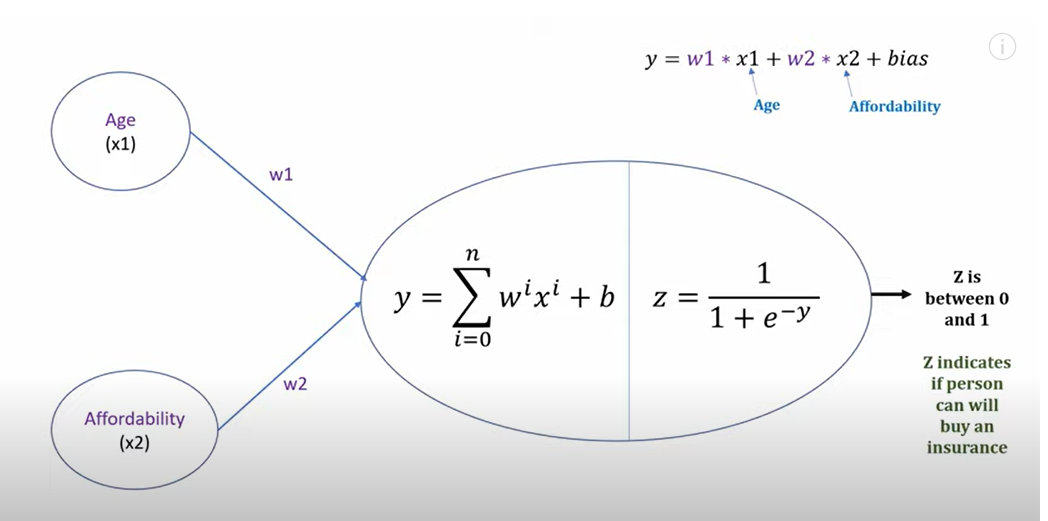


# Explanation
 weighted_sum = w1 * age + w2 * affordability + bias
 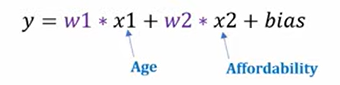
 y_predicted = sigmoid_numpy(weighted_sum)
 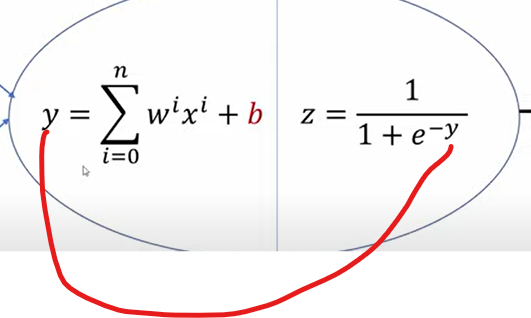
 loss = log_loss(y_true, y_predicted)
 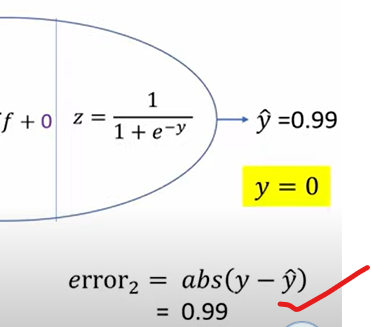  
 loss = log_loss(y_true, y_predicted)

 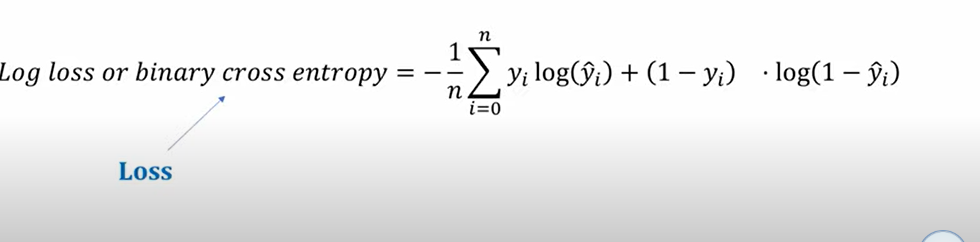
   w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
  
  w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true))
 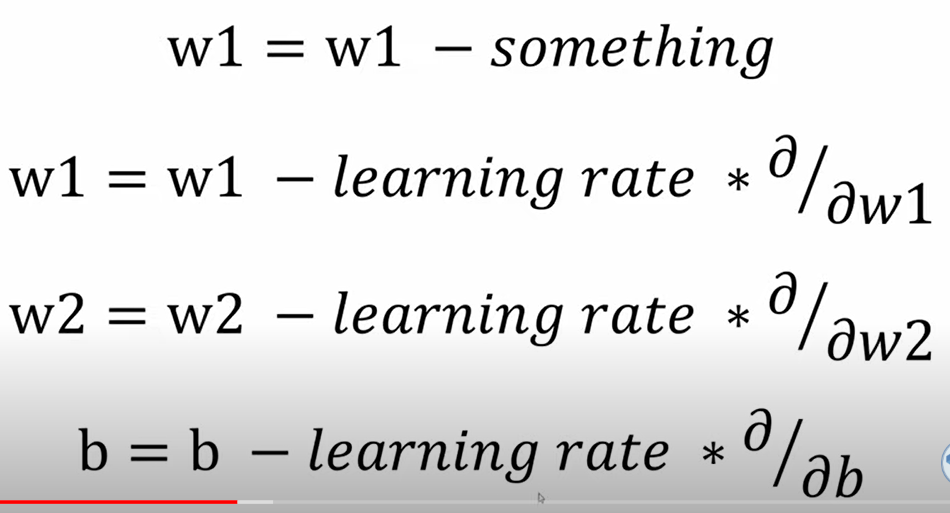
 
 

In [29]:
gradient_descent(X_train_scaled['age'],X_train_scaled['affordibility'],y_train,1000, 0.4631)

Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.11341867736368583, loss:0.7113403233723417
Epoch:1, w1:0.9556229728273669, w2:0.9058873696677865, bias:-0.2122349122718517, loss:0.681264778737757
Epoch:2, w1:0.9416488476693794, w2:0.8719790823960313, bias:-0.2977578997796538, loss:0.6591474252715025
Epoch:3, w1:0.9323916996249162, w2:0.8457541517722915, bias:-0.3715094724003511, loss:0.6431523291301917
Epoch:4, w1:0.9272267472726993, w2:0.8262362885332687, bias:-0.43506643026891584, loss:0.6316873063379158
Epoch:5, w1:0.9255469396815343, w2:0.8124402814952774, bias:-0.48994490058938817, loss:0.623471707997592
Epoch:6, w1:0.9267936114129968, w2:0.8034375029757677, bias:-0.5375299543522853, loss:0.6175321183044205
Epoch:7, w1:0.93047170420295, w2:0.7983920007454487, bias:-0.5790424270894963, loss:0.6131591858705934
Epoch:8, w1:0.9361540784567942, w2:0.7965748796787705, bias:-0.6155315088627655, loss:0.6098518179750948
Epoch:9, w1:0.9434791243557357, w2:0.7973647616854131, bia

Epoch:143, w1:2.7620360898674545, w2:1.3625161715956968, bias:-1.9445176396319575, loss:0.5203534541809204
Epoch:144, w1:2.7746084404162286, w2:1.3635905061511575, bias:-1.9505246507415273, loss:0.5199615422134104
Epoch:145, w1:2.7871584405883882, w2:1.3646477717765084, bias:-1.9565093078173448, loss:0.5195713711450982
Epoch:146, w1:2.7996860774661627, w2:1.3656883028554427, bias:-1.9624718597000501, loss:0.5191829289852048
Epoch:147, w1:2.812191339383267, w2:1.3667124274051177, bias:-1.9684125510037105, loss:0.5187962039411522
Epoch:148, w1:2.8246742159004152, w2:1.367720467201086, bias:-1.974331622196247, loss:0.5184111844124737
Epoch:149, w1:2.8371346977812815, w2:1.3687127378995891, bias:-1.9802293096782038, loss:0.5180278589849453
Epoch:150, w1:2.8495727769689077, w2:1.369689549157275, bias:-1.986105845859897, loss:0.5176462164249294
Epoch:151, w1:2.861988446562541, w2:1.3706512047484005, bias:-1.9919614592369834, loss:0.517266245673921
Epoch:152, w1:2.8743817007948964, w2:1.37159

Epoch:283, w1:4.3109378579290745, w2:1.433965227124362, bias:-2.637314949417191, loss:0.47873137833929297
Epoch:284, w1:4.320569133966964, w2:1.4342533975485452, bias:-2.6415006349603525, loss:0.47851000968900853
Epoch:285, w1:4.330181895625803, w2:1.4345409077371913, bias:-2.6456781870674306, loss:0.4782894932954603
Epoch:286, w1:4.339776184022467, w2:1.4348277792954356, bias:-2.6498476398242916, loss:0.47806982533527886
Epoch:287, w1:4.349352040264972, w2:1.435114033371397, bias:-2.6540090269567256, loss:0.47785100200463954
Epoch:288, w1:4.358909505450577, w2:1.4353996906646287, bias:-2.658162381836163, loss:0.4776330195191349
Epoch:289, w1:4.368448620663914, w2:1.4356847714344168, bias:-2.6623077374852917, loss:0.47741587411365194
Epoch:290, w1:4.377969426975163, w2:1.4359692955079275, bias:-2.666445126583577, loss:0.4771995620422475
Epoch:291, w1:4.387471965438257, w2:1.43625328228821, bias:-2.6705745814726813, loss:0.47698407957802763
Epoch:292, w1:4.396956277089129, w2:1.43653675

(5.051047623653049, 1.4569794548473887, -2.9596534546250037)

In [30]:
coef, intercept

(array([[5.060863 ],
        [1.4086521]], dtype=float32),
 array([-2.913703], dtype=float32))

This shows that in the end we were able to come up with same value of w1,w2 and bias using a plain python implementation of gradient descent function